Successfully saved figure random_figure2 as .png file to .\random\figures


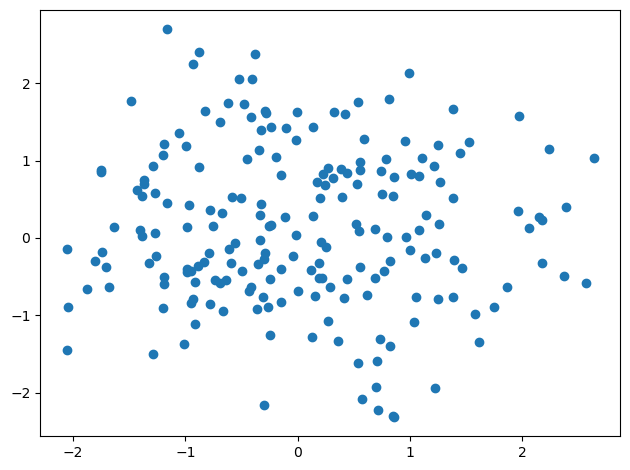

In [24]:
## utils.datasets.fetch_dataset example usage:
# df = pd.read_parquet(**fetch_dataset("emnist-byclass-train", "raw"))

## utils.figures.save_figure example usage:
# X = np.random.randn(200, 2)
# plt.scatter(X[:, 0], X[:, 1])
# save_figure("random", "random_figure2", "png")

In [34]:
import os
import time
import sys
import psutil
import GPUtil
import cpuinfo
import platform
from tqdm import tqdm

# standard data manipulation libs --------------------------------------
import numpy as np
import pandas as pd
np.random.seed(42)

# data visualization libs ----------------------------------------------
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

#beautification of plots
pio.templates.default = "simple_white"

px.defaults.template = "plotly_white"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 1200
px.defaults.height = 750

# scikit-learn base transformers ----------------------------------------
from sklearn.base import BaseEstimator, TransformerMixin

# sckit-learn preprocessing methods -------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# scikit-learn cross validation methods ---------------------------------
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# scikit-learn classication evaluation metrics --------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# scikit-learn splitting techniques -------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold 

# scikit-learn clustering methods ---------------------------------------
from sklearn.cluster import KMeans

# scikit-learn classifiers ----------------------------------------------
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# custom libraries ------------------------------------------------------
from src.utils.figures import save_figure
from src.utils.datasets import fetch_dataset

# ignoring future warnings for better notebook readability --------------
from warnings import simplefilter 
simplefilter('ignore', FutureWarning)

# 1 Get the prepared Datasets
We prepared the data for furhter experiments in previous notebooks. We will load those into the notebook.

## 1.1 EMNIST
* The EMNIST "By_Class" and "By_Merge" Datasets.

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000].to_numpy(), X[60000:].to_numpy(), y[:60000].to_numpy().astype("int8"), y[60000:].to_numpy().astype("int8")

# reshape and scale data
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train, X_test = X_train/255, X_test/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 1.2 SDSS17
* The Sloan Digital Sky Survey (Release 17) Dataset

# Reduction Algorithms

In [2]:
class ClusterCentroidsSelection(BaseEstimator, TransformerMixin):

  def __init__(self, sample_size, random_state):
    self.ssize = sample_size
    self.random_state = random_state

  def fit(self, X, y=None):
    return self

  def fit_transform(self, X, y):
    samples_per_class = self._det_clusters_per_class(y)

    X_ = np.empty(shape=(0, X.shape[1]), dtype=X.dtype)
    y_ = np.empty(shape=(0), dtype=np.int8)

    for class_, ssize_ in zip(np.unique(y), samples_per_class):
      # get current class
      X_k = X[y==class_]

      # cluster current class with respective sample size (ssize) as num of clusters
      kmeans = KMeans(n_clusters=ssize_,
                      init="k-means++",
                      n_init="auto",
                      max_iter=300,
                      algorithm="lloyd",
                      random_state=42)
      kmeans.fit(X_k)

      # add cluster centers to reduced dataset and label accordingly
      cluster_representatives = kmeans.cluster_centers_
      X_ = np.vstack((X_, cluster_representatives))
      y_ = np.hstack([y_, np.ones(len(cluster_representatives)) * class_])

    return X_, y_

# Metrics we consider for our Experiments
* Measuring Model Performance
* Measuring Methods effectiveness and efficiency
* Measuring discrepancy in performances before and after reduction
* Measuring Dataset representativeness

# Reduction Framework

In [7]:
# how to determine suitable sample sizes
## - something based on resources available

# Predicting Test Data with reduced training

# Prediciting discarded Data with reduced training